# Life Expectancy Data Analysis

Dataset: Information from Kaggle on the life expectancies of males and females in different countries.

Business Understanding/Goal: Learn about the life expectancy trends of males and females in different countries.

## Import Libraries

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [163]:
df = pd.read_csv("data/life_expectancy.csv")

## Understand the Data

In [164]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17003 entries, 0 to 17002
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              17003 non-null  int64  
 1   Country                 17003 non-null  object 
 2   Country Code            17003 non-null  object 
 3   Year                    17003 non-null  int64  
 4   Female Life Expectancy  17003 non-null  float64
 5   Male Life Expectancy    17003 non-null  float64
 6   Population              17003 non-null  float64
 7   Life Expectancy Gap     17003 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.0+ MB


Columns that look useful: Country, Year, Female Life Expectancy, Male Life Expectancy, Population, Life Expectancy Gap

From the above info, I could try to figure out:
- What Country had the highest life expectancy for male/female, in what year
- What Country had the lowest life expectancy for male/female, in what year
- The trend of life expectancy: if it has improved over time
- Trend of population: increase or decrase for which countries?
- Life expectancy gap: increase or decrease over time?

In [165]:
df.head()
df.describe()
df.columns
df.shape

(17003, 8)

## Data Processing/Preparation

### Dropping Unnecessary Columns

In [166]:
df.columns
# got rid of unecessary columns
df = df[['Country', 'Year',
       'Female Life Expectancy', 'Male Life Expectancy', 'Population',
       'Life Expectancy Gap']]

### Checking for duplicates

In [167]:
df.duplicated().sum()
# There are no duplicated rows

# there are duplicated countries because of different years
df.duplicated(["Country"]).sum()

16756

In [168]:
# sort the rows by year: earliest to most recent
df = df.sort_values(["Year"]).reset_index(drop=True)

### Check for null values

In [169]:
# there are no null values
df.isna().sum()

Country                   0
Year                      0
Female Life Expectancy    0
Male Life Expectancy      0
Population                0
Life Expectancy Gap       0
dtype: int64

## Data Analysis

In [170]:
df.describe()

,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
count,17003.000000,17003.000000,17003.000000,1.700300e+04,17003.000000
mean,1985.519085,66.168444,61.202554,2.131189e+07,-4.965890
std,20.790029,12.521956,11.578585,9.442073e+07,2.390082
min,1950.000000,12.700000,10.100000,1.363000e+03,-29.500000
25%,1968.000000,57.800000,53.700000,2.390965e+05,-6.300000
50%,1986.000000,69.200000,63.600000,3.245066e+06,-4.800000
75%,2004.000000,75.900000,69.900000,1.103752e+07,-3.400000
max,2021.000000,88.700000,84.800000,1.425894e+09,9.900000


In [171]:
us_life_expectancy = df.query("Country == 'United States'")

In [172]:
us_life_expectancy.describe()

,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
count,72.00000,72.000000,72.000000,7.200000e+01,72.000000
mean,1985.50000,77.370833,71.033333,2.419322e+08,-6.337500
std,20.92845,3.154940,3.777845,5.670760e+07,1.006519
min,1950.00000,71.000000,65.400000,1.482816e+08,-7.800000
25%,1967.75000,74.250000,66.900000,1.952532e+08,-7.125000
50%,1985.50000,78.250000,71.100000,2.363295e+08,-6.500000
75%,2003.25000,79.800000,74.425000,2.918193e+08,-5.200000
max,2021.00000,81.700000,76.600000,3.369976e+08,-4.800000


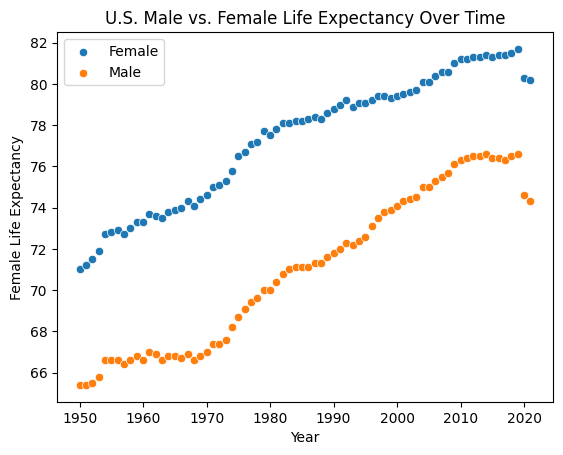

In [173]:

plt.title("U.S. Male vs. Female Life Expectancy Over Time")
sns.scatterplot(data=us_life_expectancy, x="Year", y="Female Life Expectancy", label="Female")
sns.scatterplot(data=us_life_expectancy, x="Year", y="Male Life Expectancy", label="Male")
plt.legend()


<Axes: title={'center': 'U.S. Life Expectancy Gap Over Time'}, xlabel='Year', ylabel='Life Expectancy Gap'>

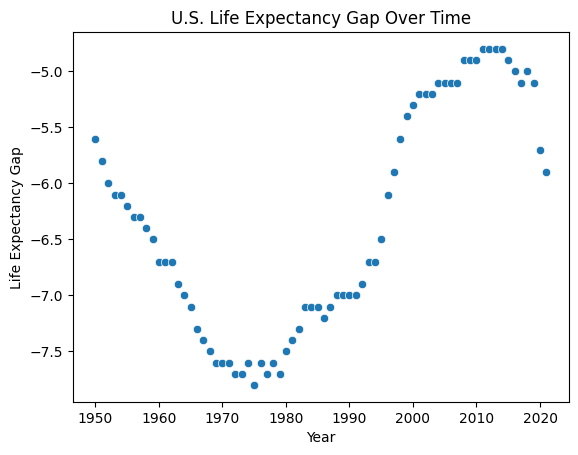

In [174]:
plt.title("U.S. Life Expectancy Gap Over Time")
sns.scatterplot(data=us_life_expectancy, x="Year", y="Life Expectancy Gap")

### What country had the biggest negative (females lived longer than males) life expectancy gap? What year?

In [175]:
df.groupby("Country")[["Life Expectancy Gap"]].min().sort_values(["Life Expectancy Gap"])

,Life Expectancy Gap
Country,
Palestine,-29.5
Cyprus,-27.0
Bosnia and Herzegovina,-21.4
El Salvador,-20.7
Eritrea,-18.4
...,...
India,-3.3
Guinea,-2.9
Maldives,-2.7


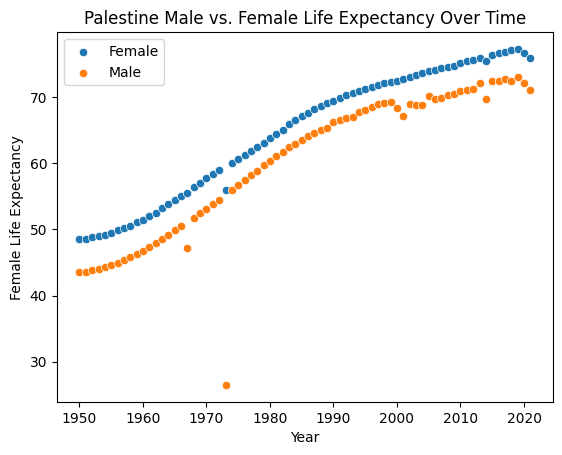

In [176]:
palestine = df.query("Country == 'Palestine'")
plt.title("Palestine Male vs. Female Life Expectancy Over Time")
sns.scatterplot(data=palestine, x="Year", y="Female Life Expectancy", label="Female")
sns.scatterplot(data=palestine, x="Year", y="Male Life Expectancy", label="Male")

plt.legend()
plt.show()

<Axes: title={'center': 'Palestine Life Expectancy Gap Over Time'}, xlabel='Year', ylabel='Life Expectancy Gap'>

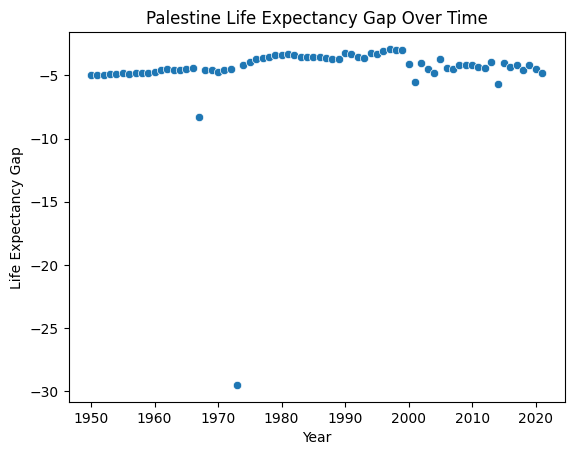

In [177]:
plt.title("Palestine Life Expectancy Gap Over Time")
sns.scatterplot(data=palestine, x="Year", y="Life Expectancy Gap")

In [178]:
#Filter rows to find what year palestine gap was -29.5
df.loc[df['Life Expectancy Gap'] == -29.5]

,Country,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
5556,Palestine,1973,56.0,26.5,1195405.0,-29.5


Out of the all the data in the dataset, Palestine had the biggest positive life expectancy gap in 1973, where males' life expectancy was 26.5 years while females were expected to live 56 years. I found this by using groupby to isolate the country and life expectancy gap columns, and then I sorted the gap from biggest to smallest. Then I used loc to isolate the row to get more data on the specific ages and year.

### Statistical Analysis Question: What country had the biggest positive (males live longer than females) life expectancy gap? What year?

In [179]:
df.groupby("Country")[["Life Expectancy Gap"]].max().sort_values(["Life Expectancy Gap"], ascending=False)

,Life Expectancy Gap
Country,
British Virgin Islands,9.9
Bangladesh,3.8
Pakistan,3.0
Cook Islands,2.7
Wallis and Futuna,2.4
...,...
Kazakhstan,-7.2
Georgia,-7.4
Estonia,-7.4


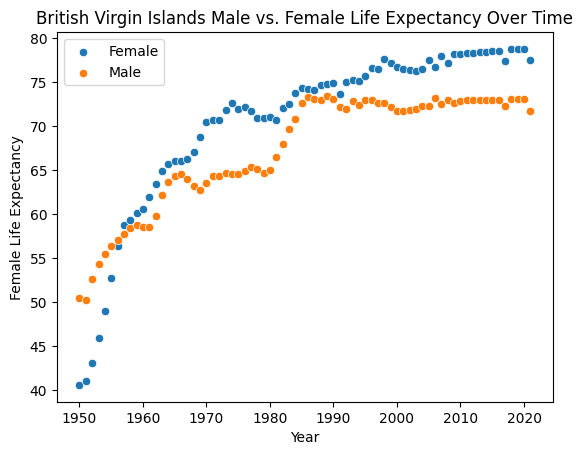

In [180]:
bvi = df.query("Country == 'British Virgin Islands'")
plt.title("British Virgin Islands Male vs. Female Life Expectancy Over Time")
sns.scatterplot(data=bvi, x="Year", y="Female Life Expectancy", label="Female")
sns.scatterplot(data=bvi, x="Year", y="Male Life Expectancy", label="Male")

plt.legend()
plt.show()

<Axes: title={'center': 'British Virgin Islands Life Expectancy Gap Over Time'}, xlabel='Year', ylabel='Life Expectancy Gap'>

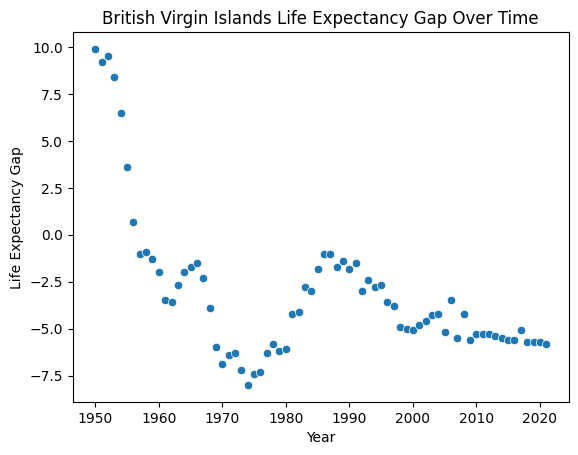

In [181]:
plt.title("British Virgin Islands Life Expectancy Gap Over Time")
sns.scatterplot(data=bvi, x="Year", y="Life Expectancy Gap")

In [182]:
#Filter rows to find what year BVI gap was 9.9
df.loc[df['Life Expectancy Gap'] == 9.9]

,Country,Year,Female Life Expectancy,Male Life Expectancy,Population,Life Expectancy Gap
115,British Virgin Islands,1950,40.6,50.5,7379.0,9.9


Out of the all the data in the dataset, the British Virgin Islands had the biggest positive life expectancy gap in 1950, where males' life expectancy was 50.5 years while females were expected to live 40.6 years. I found this by using groupby to isolate the country and life expectancy gap columns, and then I sorted the gap from biggest to smallest. Then I used loc to isolate the row to get more data on the specific ages and year.

### Statistical Analysis Question: Which country has the smallest life expectancy gap between males and females over all the years?

In [183]:
# DONE WITH CHATGPT (finding the country with the smallest life expectancy gap between males and females over all the years)
# Create a new column for the absolute value of the life expectancy gap
df['Absolute Gap'] = abs(df['Life Expectancy Gap'])

# Group by country and find the minimum absolute gap across all years
min_absolute_gap_country = df.groupby('Country')['Absolute Gap'].min()

# Find the country with the smallest absolute gap
closest_country_absolute = min_absolute_gap_country.idxmin()

print(f"The country with the smallest absolute life expectancy gap across all years is: {closest_country_absolute}")


The country with the smallest absolute life expectancy gap across all years is: Bangladesh


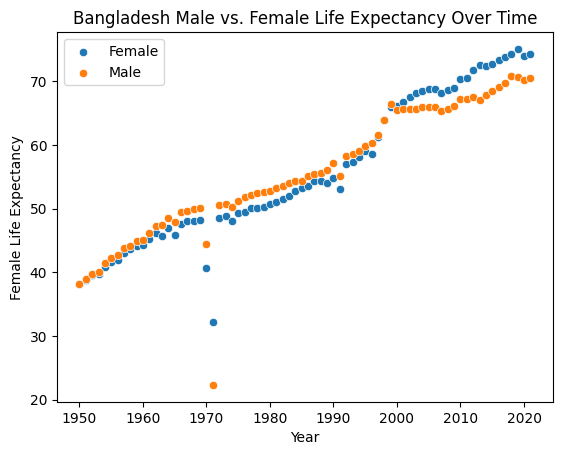

In [184]:
bangladesh = df.query("Country == 'Bangladesh'")
plt.title("Bangladesh Male vs. Female Life Expectancy Over Time")
sns.scatterplot(data=bangladesh, x="Year", y="Female Life Expectancy", label="Female")
sns.scatterplot(data=bangladesh, x="Year", y="Male Life Expectancy", label="Male")
plt.legend()